In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Mumbai_1990_2022_Santacruz.csv')

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

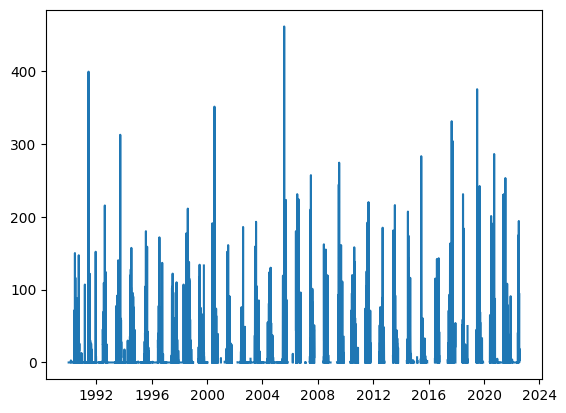

In [9]:
plt.plot(df['time'],df['prcp'])

In [10]:
data=df[['time','prcp']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_21132\1627567933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,0.0
1,1990-01-02,0.0
2,1990-01-03,0.0
3,1990-01-04,0.0
4,1990-01-05,0.0


In [11]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [12]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.827% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (226) is too small than the required number                     for the learning rate finder (246). The results might not be optimal.


Finding best initial lr:   0%|          | 0/246 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,63.800976,78.814438,0.443753,0.0,0
1,56.914288,70.761726,0.373408,0.0,1
2,50.493195,63.310051,0.309619,0.0,2
3,44.543556,56.203636,0.252730,0.0,3
4,39.137726,50.070015,0.204464,0.0,4
...,...,...,...,...,...
995,11.841870,24.563755,0.053935,0.0,995
996,11.863511,24.280075,0.053990,0.0,996
997,11.891275,24.602520,0.054247,0.0,997
998,11.841594,24.597464,0.053935,0.0,998


In [14]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.827% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 226it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,22.777515,8.312711,14.051563,0.413241
1,2022-07-27,None,22.441101,8.312972,13.548905,0.579225
2,2022-07-28,None,21.387434,8.313234,13.046717,0.027482
3,2022-07-29,None,20.846600,8.313496,12.547024,-0.013922
4,2022-07-30,None,19.850927,8.313756,12.054369,-0.517197


In [15]:
plot1=model.plot(forecast)


In [16]:
plot1


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '306eaad3-e17e-419e-a4e7-231c25180bb1',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([22.777515 , 22.441101 , 21.387434 , ...,  3.4944494,  2.913107 ,
                           2.8414035], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              '

In [17]:
with open('mumbai_prec_model.pkl','wb') as f:
    pickle.dump(model,f)